# XGBoost - Heart Disease (Classification)

[ch6-xgboost-hyperparameters.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch6-xgboost-hyperparameters.ipynb)

In [1]:
import xgboost as xgb
xgb.set_config(verbosity=0)

In [2]:
import pandas as pd
#df = pd.read_csv('heart_disease.csv')
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter06/heart_disease.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum().sum()

0

### 

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
from xgboost import XGBClassifier
# model = XGBClassifier(booster='gbtree', objective='binary:logistic')
model = XGBClassifier()

### cross_val_score

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X, y, cv=5)

print('Accuracy:', np.round(scores, 2))
print('Avg. Accuracy: %0.2f' % (scores.mean()))

Accuracy: [0.84 0.85 0.82 0.8  0.77]
Avg. Accuracy: 0.81


### StratifiedKFold

In [8]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

scores = cross_val_score(model, X, y, cv=kfold)

print('Accuracy:', np.round(scores, 2))
print('Avg. Accuracy: %0.2f' % (scores.mean()))

Accuracy: [0.72 0.82 0.75 0.8  0.82]
Avg. Accuracy: 0.78


### Evaluation

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [10]:
params = model.get_params(deep=True)
params

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [11]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

print('Accuracy:', np.round(score, 3))

Accuracy: 0.829


In [12]:
model.score(X_test, y_test)

0.8289473684210527

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.80      0.90      0.85        40

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



### HPO: GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [15]:
def grid_search(params): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)
    
    grid.fit(X_train, y_train)
    
    # eval_set = [(X_test, y_test)]
    # eval_metric='error'
    # rand_clf.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set)

    best_params = grid.best_params_
    print("Best parameter:", best_params)
    
    best_score = grid.best_score_
    print('Best accuracy:', np.round(best_score, 3))

In [16]:
grid_search(
    params={'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1], 
                    'n_estimators':[50]})

Best parameter: {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 50}
Best accuracy: 0.806


### HPO: Randomized Search

In [17]:
def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2)
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    best_params = rand_clf.best_params_
    print("Best parameter:", best_params)
    
    best_score = rand_clf.best_score_
    print('Best accuracy:', np.round(best_score, 3))
    
    return best_model

In [18]:
best_model = randomized_search(
    params={'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
            'max_depth':[1], 
            'n_estimators':[50]}, 
    runs=20)

/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter: {'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.2}
Best accuracy: 0.806


In [19]:
params = best_model.get_params(deep=True)
params

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.2,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 1,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 50,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

### cross_val_score after HPO

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(best_model, X, y, cv=5)

print('Accuracy:', np.round(scores, 2))
print('Avg. Accuracy: %0.2f' % (scores.mean()))

Accuracy: [0.84 0.89 0.8  0.85 0.8 ]
Avg. Accuracy: 0.83


### StratifiedKFold after HPO

In [21]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

scores = cross_val_score(model, X, y, cv=kfold)

print('Accuracy:', np.round(scores, 2))
print('Avg. Accuracy: %0.2f' % (scores.mean()))

Accuracy: [0.72 0.82 0.75 0.8  0.82]
Avg. Accuracy: 0.78


In [22]:
# best_model.save_model('best_model.model')

### Verify the new hyperparameters

In [23]:
learning_rate = params['learning_rate']
max_depth = params['max_depth']
n_estimators = params['n_estimators']

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False,
                      learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', np.round(accuracy, 3))

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred = y_pred))

Accuracy: 0.934
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.91      0.97      0.94        40

    accuracy                           0.93        76
   macro avg       0.94      0.93      0.93        76
weighted avg       0.94      0.93      0.93        76



### Feature Importance

In [25]:
print(model.feature_importances_)

[0.05738975 0.0451665  0.16566731 0.02298339 0.03130868 0.
 0.         0.03700054 0.13796113 0.08845034 0.11684258 0.14420071
 0.15302913]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

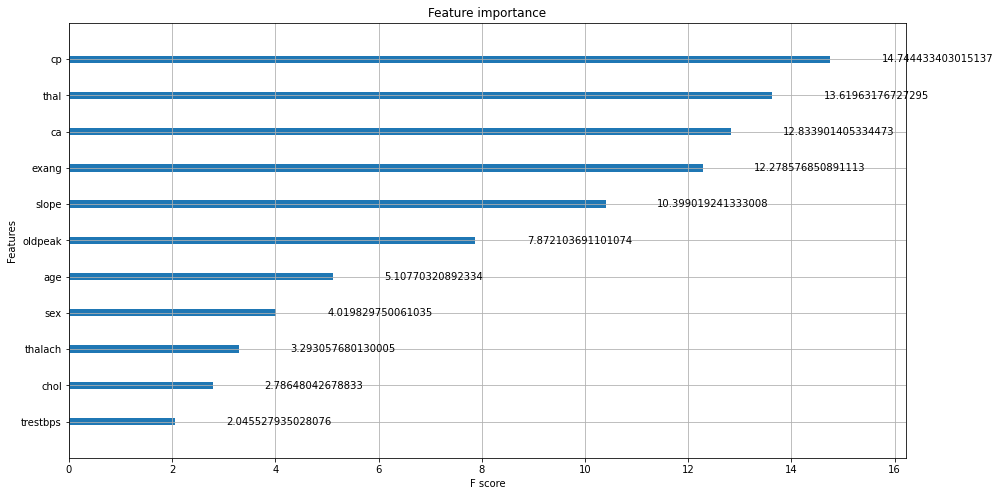

In [26]:
import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')